# Assignment 4

## Dibya Bharati Pradhan (1911067)

In [2]:
import sys
sys.path.append('/home/dibya/Documents/Dibya/Academic_Courses/')  # Add directory containing notebook to path

In [4]:
#from Library_Dibya import *
import matplotlib.pyplot as plt
import math
import numpy as np

# %run Dibya_CPL_library.ipynb


## Question 1 

[0.03491850314388621, 0.9733837983029119, 0.7755326292656126, 0.6046639399304071, 0.8677736401929064, 0.3665221903424699, 0.6506928758928027]


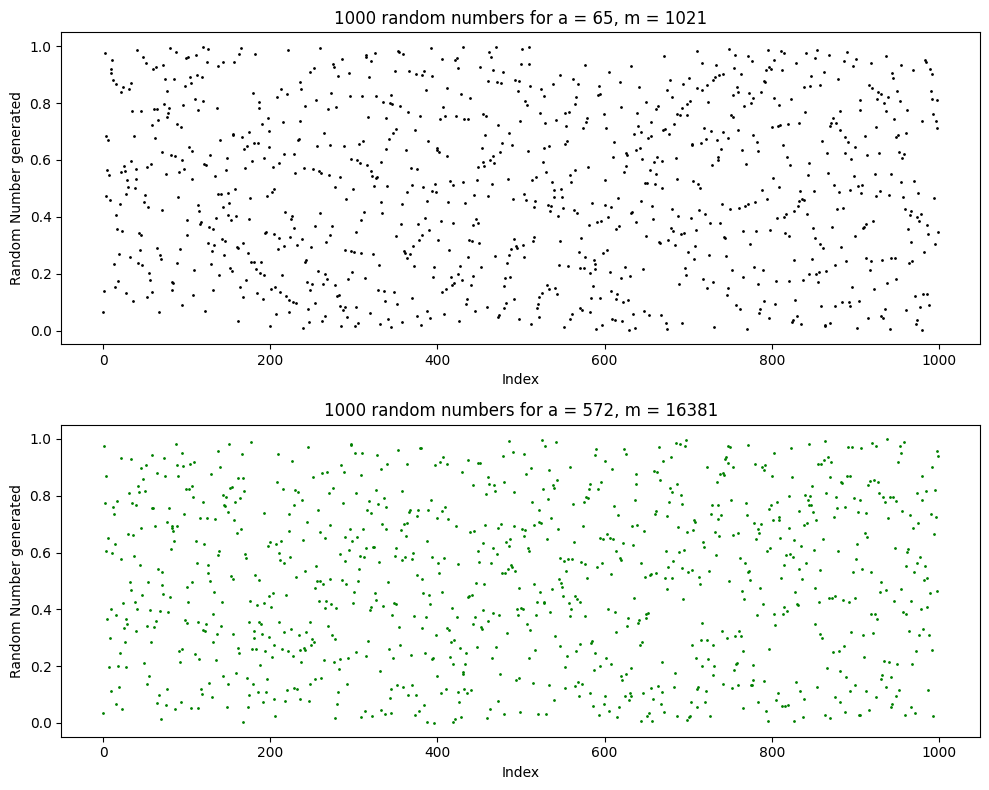

In [6]:

def linear_congruential_generator(n, start=0, stop=1, a=572, m=16381, c=0, seed=1):
    x = seed
    random_numbers = [(x := (a * x) % m) / m * (stop - start) + start for _ in range(n)]
    return random_numbers[0] if n == 1 else random_numbers

print(linear_congruential_generator(7))

random_n_1= linear_congruential_generator(1000, start=0, stop=1, a = 65, m = 1021, c=0, seed=1)
random_n_2 = linear_congruential_generator(1000, start=0, stop=1, a = 572, m = 16381, c=0, seed=1)

plt.figure(figsize=[10, 8])  
plt.subplot(2, 1, 1)  
plt.plot(random_n_1, 'k.', markersize=2)
plt.title('1000 random numbers for a = 65, m = 1021')
plt.ylabel('Random Number generated')
plt.xlabel('Index')

plt.subplot(2, 1, 2)  
plt.plot(random_n_2, 'g.', markersize=2)
plt.title('1000 random numbers for a = 572, m = 16381')
plt.xlabel('Index')
plt.ylabel('Random Number generated')

plt.tight_layout()



## Question 2 

The final value is -0.0003969630589585204


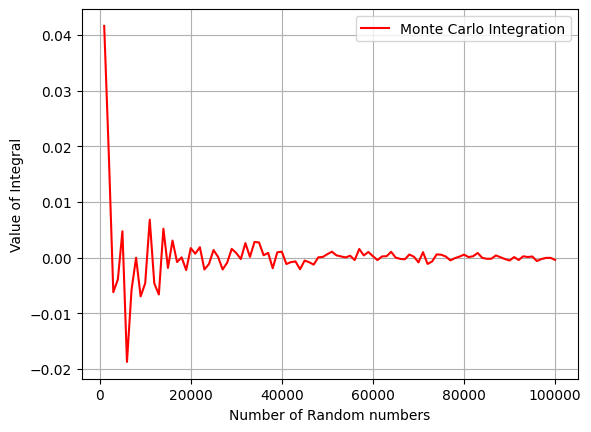

In [158]:
def random_gen(a,m,i,f,x0=1):
    Ran=linear_congruential_generator(a,m,x0)
    return(i+(f-i)*Ran)

def f_x(x):
    return(np.cos(x))


def Mont(func,a,b,N=1000):
    f=sum(func(linear_congruential_generator(439,N,a,b)[:N]))
    F=(b-a)*f/N
    return(F)


def Mont_plotting(func,a,b,i,f,step):
    X=np.arange(i,f+1,step)
    Y=[]
    for i in X:
        Y.append(Mont(func,a,b,i))
    return(X,Y)


x,y=Mont_plotting(f_x,-np.pi/2,np.pi/2,1000,100000,1000)

plt.ylabel('Value of Integral')
plt.xlabel('Number of Random numbers')
plt.grid()
plt.plot(x,y, color='red', label='Monte Carlo Integration')
plt.legend()

print('The final value is '+str(y[-1]))

plt.show()

## Question 3 



In [159]:
def random_gen(a,m,x0=1):
    R=np.ones(m)
    R[0]=x0
    for i in range(1,m):
        R[i]=a*R[i-1]%m
    return(R/m)

def random_generation(a,m,i,f,x0=1):
    Ran=random_gen(a,m,x0)
    return(i+(f-i)*Ran)

def Mont_var(integrand,funcsample,Invfunc,N=1000):
    t=Invfunc(random_generation(469,N,0,1))
    f=sum(integrand(t)/funcsample(t))
    f2=sum((integrand(t)/funcsample(t))**2)
    F=f/N
    variance=f2/N-(f/N)**2
    return(F,variance)


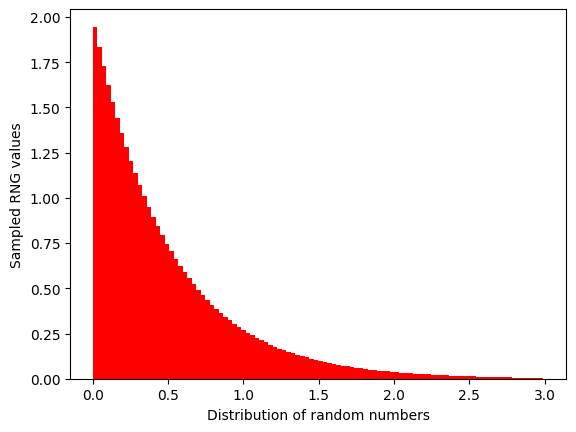

In [160]:
def f1(x):
    return(-0.5*np.log(1-(1-np.exp(-6))*x))

S1=f1(random_generation(439,1000000,0,1))
plt.hist(S1,100,density=True, color='red')
plt.xlabel('Distribution of random numbers')
plt.ylabel('Sampled RNG values')
plt.show()


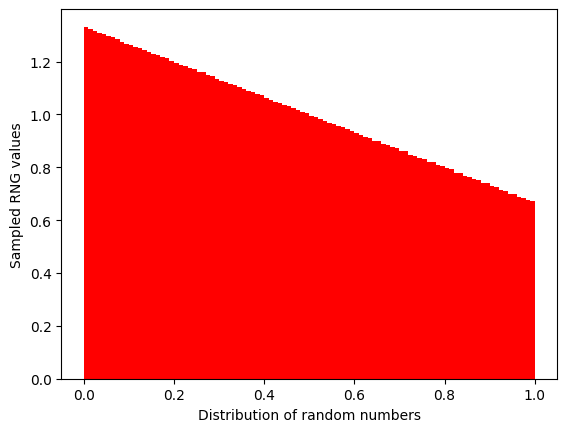

In [161]:
def f2(x):
    return(2-0.5*np.sqrt(16-12*x))

S2=f2(random_generation(439,1000000,0,1))
plt.hist(S2,100,density=True, color='red')
plt.xlabel('Distribution of random numbers')
plt.ylabel('Sampled RNG values')
plt.show()


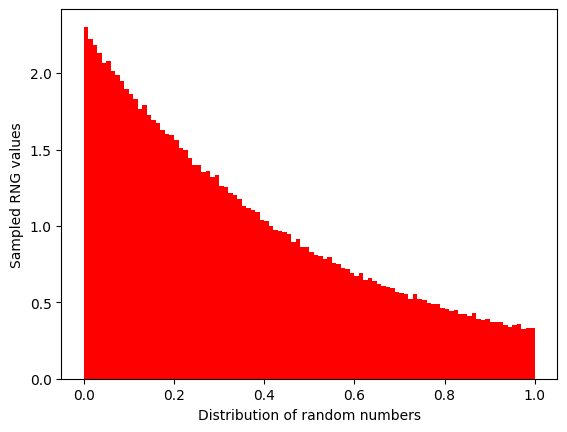

In [162]:
def f3(x):
    return(2-x)

def f4(x):
    return(np.exp(-2*x))

def random_gen_accept_reject(f,g,c,N):
    X=f2(random_generation(439,100*N,0,1))
    U=random_generation(469,100*N,0,1)
    Z=[]
    i=0
    while len(Z)<N:
        if U[i]<=f(X[i])/(c*g(X[i])):
            Z.append(X[i])
        i+=1
    return(np.array(Z))

S3=random_gen_accept_reject(f4,f3,2,500000)

plt.hist(S3,100,density=True, color='red')
plt.xlabel('Distribution of random numbers')
plt.ylabel('Sampled RNG values')
plt.show()

## Question 4 

In [175]:


def Mont_var(integrand,funcsample,Invfunc,N=1000):
    t=Invfunc(random_generation(469,N,0,1))
    plt.hist(t,20, color='red')
    f=sum(integrand(t)/funcsample(t))
    f2=sum((integrand(t)/funcsample(t))**2)
    F=f/N
    variance=f2/N-(f/N)**2
    return(F,variance)



The integrand = 0.399
The variance = 0.271
This plot has the least resemblance with the integrand function


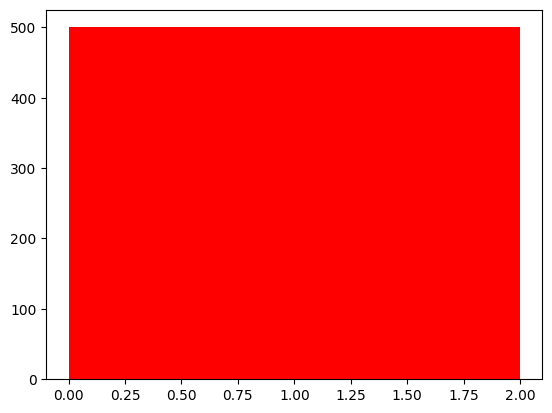

In [176]:
def func(x):
    return(np.exp(-2*x)/(1+x**2))

def func_1(x):
    return(0.5)

I,var=Mont_var(func,func_1,lambda x: 2*x,N=10000)


print("The integrand = "+str(round(I,3)))
print("The variance = "+str(round(var,3)))
print("This plot has the least resemblance with the integrand function")


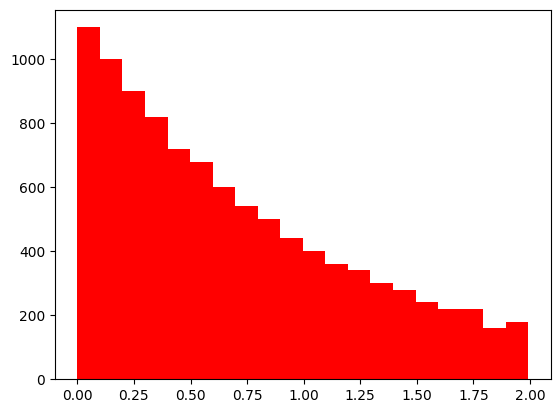

In [177]:
def func_2(x):
    return(np.exp(-x)/(1-np.exp(-2)))

I,var=Mont_var(func,func_2,lambda x:-np.log(1-(1-np.exp(-2))*x),N=10000)

In [178]:
print("The integrand is "+str(round(I,3))+". The variance is "+str(round(var,3))+".")

The integrand is 0.398. The variance is 0.071.


This plot has the highest resemblance with the integrand function
The integrand is 0.398. The variance is 0.142.


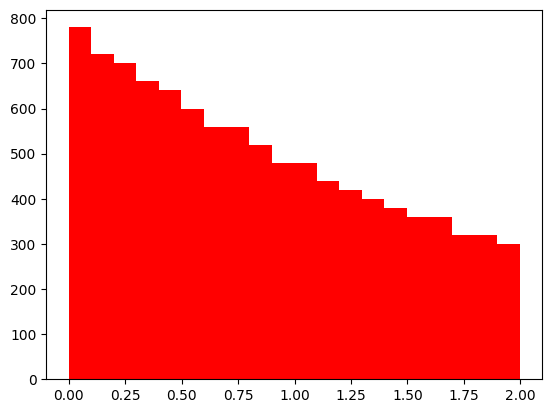

In [179]:
def func_3(x):
    return(np.exp(-x/2)/(2*(1-np.exp(-1/2))*(1+np.exp(-0.5))))

I,var=Mont_var(func,func_3,lambda x:-2*np.log(1-(1-np.exp(-1))*x),N=10000)

print("This plot has the highest resemblance with the integrand function")

print("The integrand is "+str(round(I,3))+". The variance is "+str(round(var,3))+".")

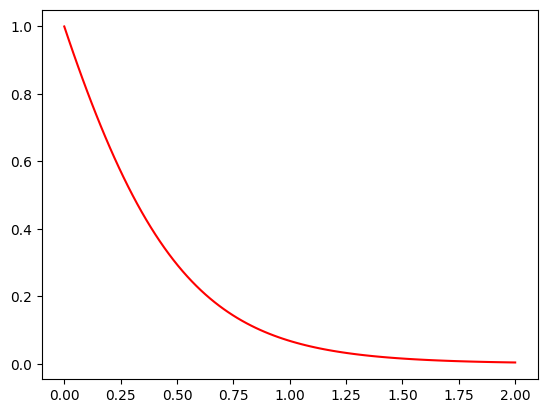

In [181]:
x=np.linspace(0,2,100)
plt.plot(x,func(x), color='red')